In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data=pd.read_csv("query_time_gen2.csv",header=None)
data.columns=['hash_size','table_number','index','query_time']

In [13]:
print(data[:10])

   hash_size  table_number  index  query_time
0         16             3      0    0.192614
1         16             3      1    0.190982
2         16             3      2    0.191696
3         16             3      3    0.194954
4         16             3      4    0.219652
5         16             3      5    0.191412
6         16             3      6    0.219865
7         16             3      7    0.191300
8         16             3      8    0.191290
9         16             3      9    0.191497


In [14]:
df=data.drop_duplicates(subset=['hash_size', 'table_number', 'index'])

In [15]:
df=df[df['table_number']==3]

In [16]:
print(df.shape)
print(df[:10])

(150, 4)
   hash_size  table_number  index  query_time
0         16             3      0    0.192614
1         16             3      1    0.190982
2         16             3      2    0.191696
3         16             3      3    0.194954
4         16             3      4    0.219652
5         16             3      5    0.191412
6         16             3      6    0.219865
7         16             3      7    0.191300
8         16             3      8    0.191290
9         16             3      9    0.191497


In [17]:
group_data=df.groupby(['hash_size','table_number'])['query_time'].mean()

In [18]:
print(group_data)

hash_size  table_number
16         3               0.197526
24         3               0.225016
32         3               0.236413
40         3               0.234929
48         3               0.227628
56         3               0.214087
64         3               0.215064
72         3               0.228981
80         3               0.229694
88         3               0.224444
96         3               0.217533
104        3               0.226788
112        3               0.229495
120        3               0.251332
128        3               0.262338
Name: query_time, dtype: float64


In [19]:
print(group_data.index.values)
print([i for (i,j) in group_data.index.values])
print(group_data.values)

[(16, 3) (24, 3) (32, 3) (40, 3) (48, 3) (56, 3) (64, 3) (72, 3) (80, 3)
 (88, 3) (96, 3) (104, 3) (112, 3) (120, 3) (128, 3)]
[16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128]
[0.19752629 0.22501602 0.23641298 0.23492899 0.22762799 0.21408746
 0.21506445 0.22898123 0.22969413 0.22444363 0.21753263 0.226788
 0.22949481 0.25133247 0.26233766]


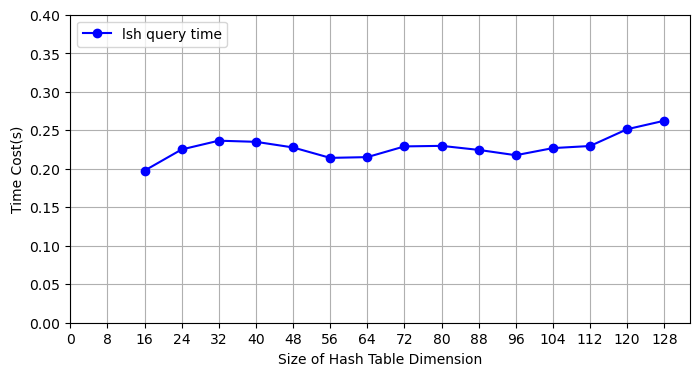

In [20]:
plt.figure(figsize=(8,4))
x_values=[i for (i,j) in group_data.index.values]
y_values=group_data.values
plt.plot(x_values,y_values,'ob-')
plt.xticks(range(0,136,8))
plt.legend(["lsh query time"],loc="upper left")
plt.ylim(ymin=0,ymax=0.4)
plt.xlim(xmin=0)
plt.xlabel("Size of Hash Table Dimension")
plt.ylabel("Time Cost(s)")
plt.grid()
plt.savefig("cifar10_hashsize_time_cost_dim_gen.png")
plt.show()

In [13]:
# df.to_csv("query_time_handle.csv")

In [36]:
data=pd.read_csv("performance.csv",header=None)
data.columns=['hash_size','table_number','hit_accuracy','accurarcy']

In [37]:
print(data[0:10])

   hash_size  table_number  hit_accuracy  accurarcy
0          8             3        0.3780   0.119600
1          8             4        0.3894   0.123150
2          8             3        0.4040   0.132300
3          8             4        0.3497   0.108350
4          8             5        0.3613   0.114500
5          8             6        0.3694   0.121475
6          8             7        0.3684   0.120775
7          8             8        0.3706   0.123900
8         16             6        0.5355   0.225075
9         16             7        0.5318   0.226325


In [40]:
df2=data[data['table_number']==3]
df2=df2[1:]

In [43]:
print(df2)
print(df2['hash_size'].values)

    hash_size  table_number  hit_accuracy  accurarcy
2           8             3        0.4040   0.132300
10         16             3        0.4794   0.184475
13         24             3        0.5784   0.253200
16         32             3        0.5909   0.273475
27         40             3        0.6072   0.287725
30         48             3        0.6054   0.291525
31         56             3        0.6055   0.293725
32         64             3        0.6139   0.301950
33         72             3        0.6142   0.303575
34         80             3        0.6125   0.300100
35         88             3        0.6088   0.299950
36         96             3        0.6089   0.300250
37        104             3        0.6140   0.301000
38        112             3        0.6053   0.300700
39        120             3        0.6109   0.304850
40        128             3        0.6116   0.304525
[  8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128]


In [90]:
df2.to_csv("performance_handle.csv")

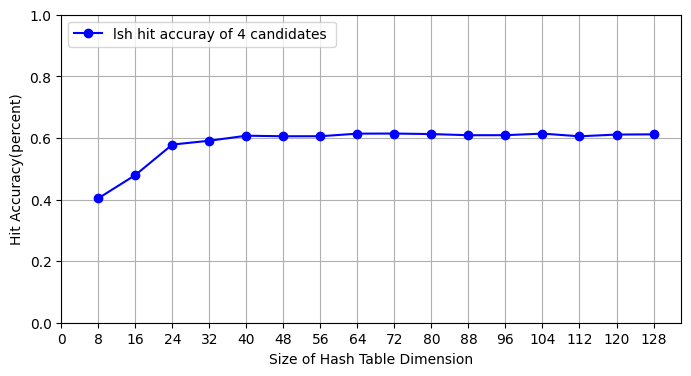

In [48]:
plt.figure(figsize=(8,4))
x_values=df2['hash_size'].values
y_values=df2['hit_accuracy'].values
plt.plot(x_values,y_values,'ob-')
plt.xticks(range(0,136,8))
plt.legend(["lsh hit accuray of 4 candidates "],loc="upper left")
plt.ylim(ymin=0,ymax=1.0)
plt.xlim(xmin=0)
plt.xlabel("Size of Hash Table Dimension")
plt.ylabel("Hit Accuracy(percent)")
plt.grid()
plt.savefig("cifar10_hit_accuracy.png")
plt.show()

In [59]:
data=pd.read_csv("time_cost.csv",header=None)
data.columns=['hash_size','table_number','index','local_cyber','server_calculation','local_recover']
df3=data[data['table_number']==3]
df3=df3.drop_duplicates(subset=['hash_size', 'table_number', 'index'])
group_data3=df3.groupby(['hash_size','table_number'])[['local_cyber','server_calculation','local_recover']].mean()

In [89]:
df3.to_csv("time_cost_handle.csv")

In [92]:
print(group_data3)

                        local_cyber  server_calculation  local_recover
hash_size table_number                                                
8         3               11.051872            0.011295       0.006884
16        3               10.793778            0.021606       0.012248
24        3               10.521710            0.025672       0.013488
32        3               10.501334            0.028682       0.017112
40        3               10.254584            0.032410       0.014637
48        3               10.350983            0.035541       0.019893
56        3               10.370401            0.037141       0.017954
64        3               10.365623            0.042059       0.020430
72        3               10.281234            0.040420       0.021425
80        3               10.261739            0.051493       0.022747
88        3               10.315139            0.052964       0.024677
96        3               10.333120            0.049838       0.026224
104   

<Figure size 800x400 with 0 Axes>

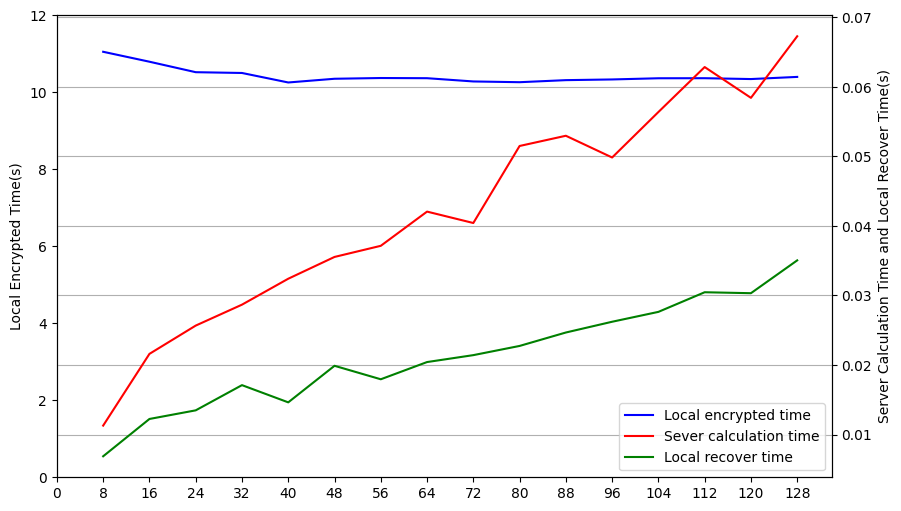

In [88]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
plt.figure(figsize=(8,4))
# 创建画布和主坐标轴（HostAxes）
fig = plt.figure(figsize=(10, 6))
# host = HostAxes(fig, [0.15, 0.15, 0.65, 0.75])  # [left, bottom, width, height]
# fig.add_axes(host)
ax1=plt.gca()
ax2=ax1.twinx()

# 创建两个寄生坐标轴（ParasiteAxes），共享X轴
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

x_values=[i for (i,j) in group_data3.index.values]
y_values=group_data3['local_cyber'].values
y_values2=group_data3['server_calculation'].values
y_values3=group_data3['local_recover'].values

# 主坐标轴（host）绘制数据1
p1, = ax1.plot(x_values, y_values, "b-", label="Local encrypted time")
# 第一个寄生轴（par1）绘制数据2
p2, = ax2.plot(x_values, y_values2, "r-", label="Sever calculation time")
# 第二个寄生轴（par2）绘制数据3
p3, = ax2.plot(x_values, y_values3, "g-", label="Local recover time")
plt.xticks(range(0,136,8))
handles,labels=[],[]
for ax in [ax1,ax2]:
    h,l=ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
plt.legend(handles,
           labels,
           loc="lower right",
           ncol=1
          )
# 调整坐标轴位置（避免重叠）
# par1.axis["right"].set_visible(True)  # 显示par1的右侧轴
# par2.axis["right"].set_axis_direction("right")  # 将par2的轴移动到右侧更远的位置
# par2.axis["right"].major_ticklabels.set_rotation("vertical")
# 合并图例
# ax.legend(handles=[p1, p2, p3], loc='upper right')
# plt.ylim(ymin=0,ymax=12)
# plt.legend(loc="lower right",fontsize=10)
ax1.set_ylim(0,12)
plt.xlim(xmin=0)
plt.xlabel("Size of Hash Table Dimension")
ax2.set_ylabel("Server Calculation Time and Local Recover Time(s)")
ax1.set_ylabel("Local Encrypted Time(s)")
plt.grid()
plt.savefig("cifar10_calculation_performance.png")
plt.show()

In [91]:
data=pd.read_csv("lsh_cifar10.csv",header=None)
print(data)

           0
0   1.727460
1   1.858457
2   3.647110
3   3.974709
4   3.859899
5   3.864062
6   4.071511
7   3.960078
8   3.963397
9   3.954019
10  4.126132
11  4.371376
12  4.369802
13  4.277600
14  4.309011
15  4.355318


In [93]:
print(group_data3)

                        local_cyber  server_calculation  local_recover
hash_size table_number                                                
8         3               11.051872            0.011295       0.006884
16        3               10.793778            0.021606       0.012248
24        3               10.521710            0.025672       0.013488
32        3               10.501334            0.028682       0.017112
40        3               10.254584            0.032410       0.014637
48        3               10.350983            0.035541       0.019893
56        3               10.370401            0.037141       0.017954
64        3               10.365623            0.042059       0.020430
72        3               10.281234            0.040420       0.021425
80        3               10.261739            0.051493       0.022747
88        3               10.315139            0.052964       0.024677
96        3               10.333120            0.049838       0.026224
104   

In [94]:
print(group_data3['local_cyber'].values+group_data3['local_recover'].values)

[11.05875566 10.8060261  10.53519781 10.5184458  10.26922061 10.37087531
 10.38835511 10.38605294 10.30265865 10.28448682 10.33981683 10.35934443
 10.39162762 10.39598589 10.37376542 10.43434608]


In [ ]:
plt.figure(figsize=(8,4))
x_values=df2['hash_size'].values
y_values=df2['hit_accuracy'].values
plt.plot(x_values,y_values,'ob-')
plt.xticks(range(0,136,8))
plt.legend(["lsh hit accuray of 4 candidates "],loc="upper left")
plt.ylim(ymin=0,ymax=1.0)
plt.xlim(xmin=0)
plt.xlabel("Size of Hash Table Dimension")
plt.ylabel("Hit Accuracy(percent)")
plt.grid()
plt.savefig("cifar10_hit_accuracy.png")
plt.show()

In [ ]:
import pickle
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import onnxruntime
import torch
from tqdm import tqdm

if __name__ == '__main__':
    file_path = 'data/cifar-10-batches-py'
    data = []
    targets = []
    with open(file_path, 'rb') as f:
                    entry = pickle.load(f, encoding='latin1')
                    data.append(entry['data'])
                    if 'labels' in entry:
                        targets.extend(entry['labels'])
                    else:
                        targets.extend(entry['fine_labels'])
    data = np.vstack(data).reshape(-1,3, 32, 32)
    data = data.transpose((0,2,3,1))
    with open('data/testdata/image.txt','w') as f:
        for i in tqdm(range(10000)):
            image = data[i]
            label = targets[i]
            img = Image.fromarray(image)
            img.save('./testdata/' + str(i) + '.png')
            f.write('./testdata/' + str(i) + '.png' + ' ' + str(label) + '\n')

In [ ]:
print(group_data3)

In [ ]:
plt.figure(figsize=(8,4))
x_values=range(6,1001,100)
y_values=[i[5][4] for i in time_cost_origin]
plt.plot(x_values,y_values,'ob-')
plt.xticks(range(0,1001,100))
plt.legend(["LSH"],loc="upper left")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.xlabel("Size of Hash Table Dimension")
plt.ylabel("Time Cost(s)")
plt.grid()
plt.savefig("time_cost_dim.png")
plt.show()